PoC - Proof of Concept

MNIST Dataset
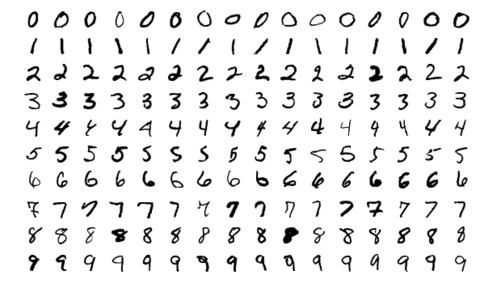

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
mnist = tf.keras.datasets.mnist

In [148]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [9]:
y_train_full.shape

60000

In [10]:
y_train_full[0]

5

In [12]:
X_test.shape

(10000, 28, 28)

In [14]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

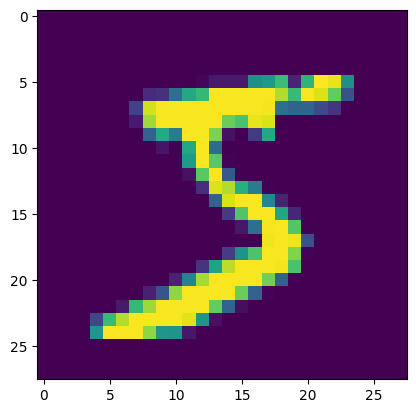

In [16]:
plt.imshow(img)

In [18]:
label = y_train_full[0]
label

5

<AxesSubplot:>

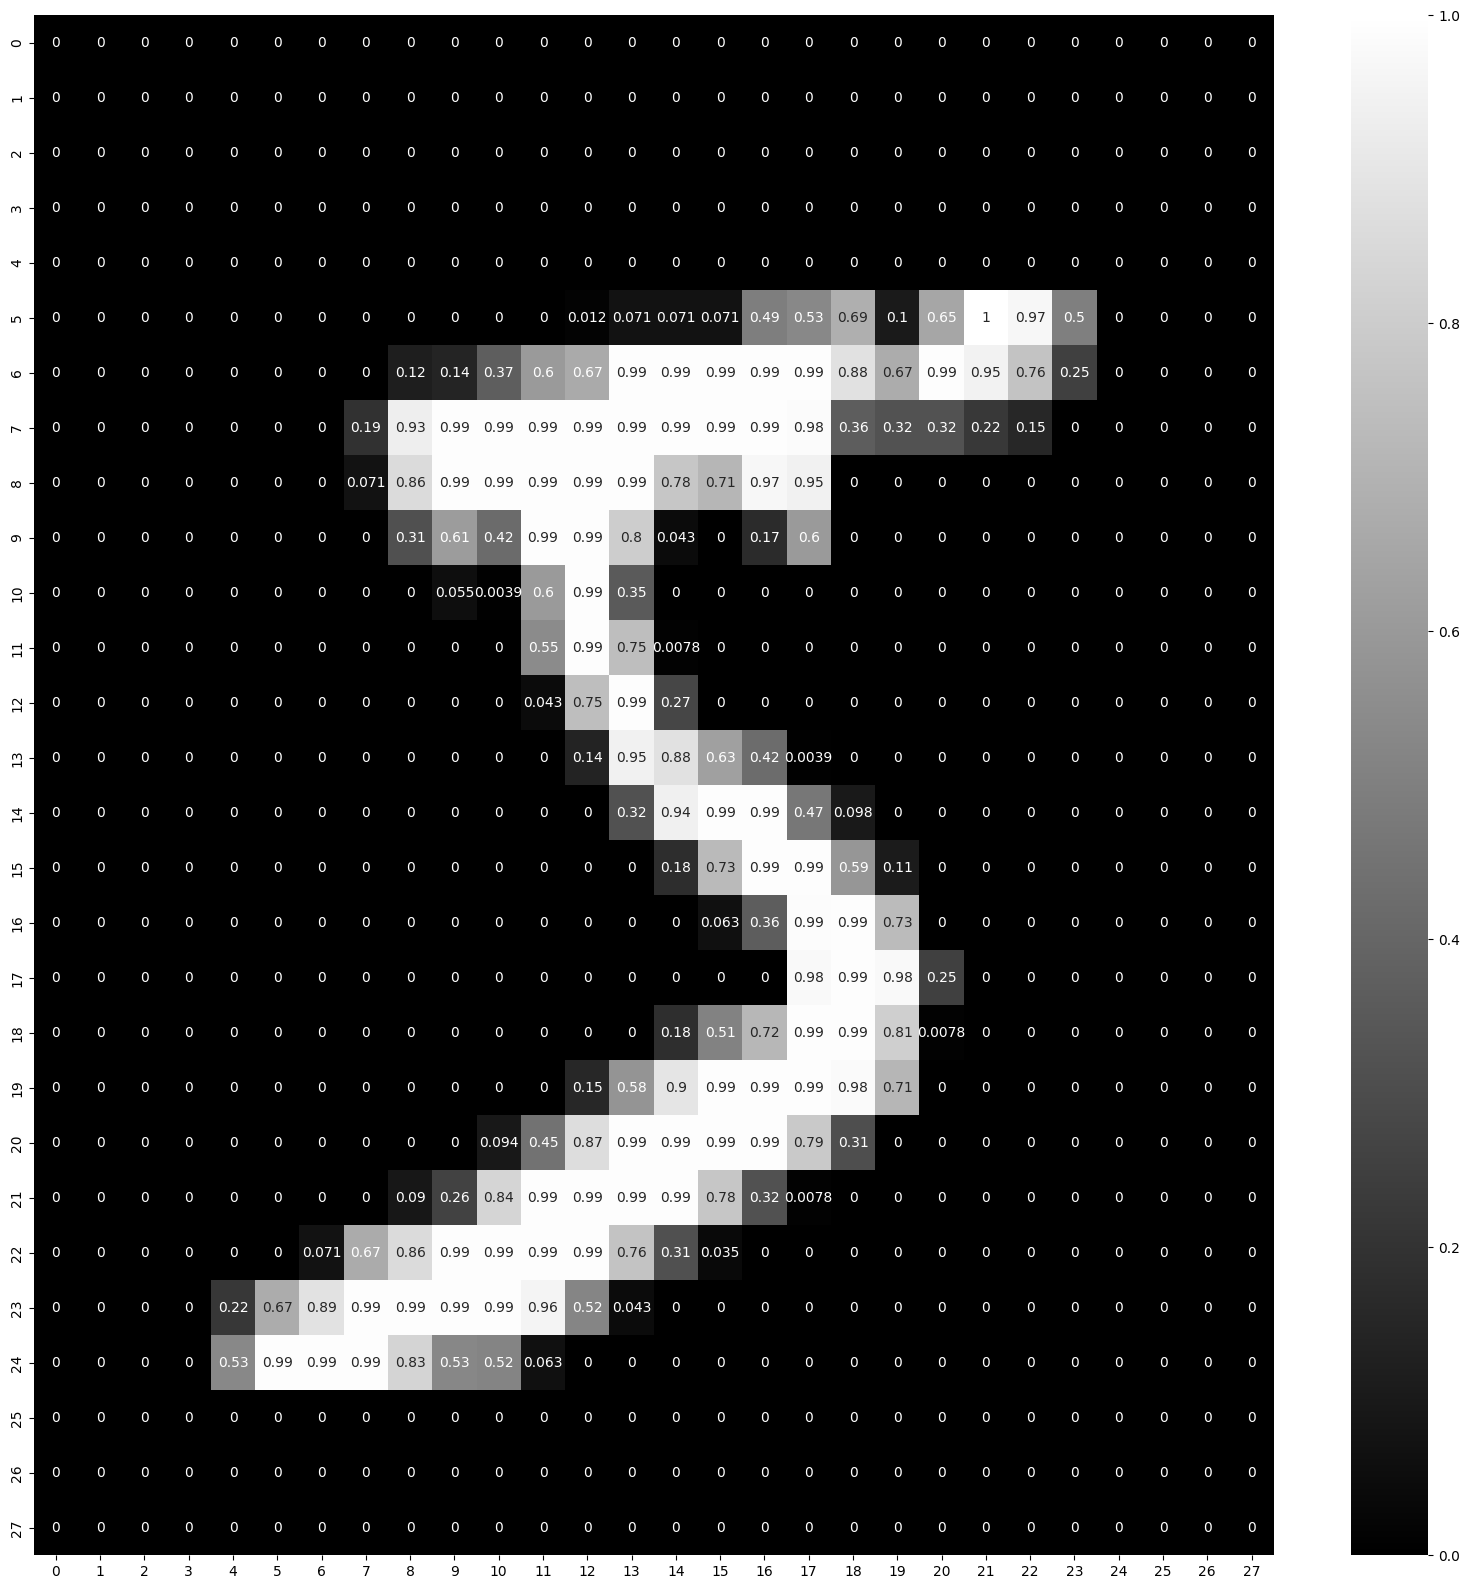

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True,cmap="gray")

In [26]:
print(1.5e+2, 1.5e+1, 1.5e+1, 15e+2)# 1.5*10**2

150.0 15.0 15.0 1500.0


In [28]:
1.5*10**2

150.0

0 -> 255 => More computation time , and search space is large for finding solution

In [31]:

X_valid,X_train = X_train_full[:5000]/255,X_train_Clfull[5000:]/255
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

X_test = X_test/255
# training set are label so no scaling

In [134]:
28*28

784

In [32]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
CLASSES =len(np.unique(y_train))
CLASSES

10

#  1-1 ANN Model

In [35]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28),name="inputlayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayers01"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayers02"),
    tf.keras.layers.Dense(CLASSES,activation="softmax",name="outputLayer")
]

In [43]:
model_clf = tf.keras.Sequential(LAYERS)

In [136]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayers01 (Dense)      (None, 300)               235500    
                                                                 
 hiddenLayers02 (Dense)      (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
784*300+300

235500

In [37]:
300*100+100

30100

In [38]:
100*10+10

1010

In [40]:
235500 + 30100+1010

266610

In [46]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS ="SGD"
METRICS = ["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZERS,metrics =METRICS)

In [49]:
EPOCHS =30
VALIDATION = (X_valid,y_valid)
history = model_clf.fit(
        X_train,
        y_train,
        epochs=EPOCHS,
        batch_size=32,
        validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1472 - accuracy: 0.9581 - val_loss: 0.1389 - val_accuracy: 0.9632
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1332 - accuracy: 0.9619 - val_loss: 0.1291 - val_accuracy: 0.9642
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1207 - accuracy: 0.9659 - val_loss: 0.1161 - val_accuracy: 0.9684
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1101 - accuracy: 0.9684 - val_loss: 0.1116 - val_accuracy: 0.9698
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1012 - accuracy: 0.9713 - val_loss: 0.1088 - val_accuracy: 0.9684
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0928 - accuracy: 0.9738 - val_loss: 0.1026 - val_accuracy: 0.9710
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9756 - val_loss: 0.0960 - val_accuracy:

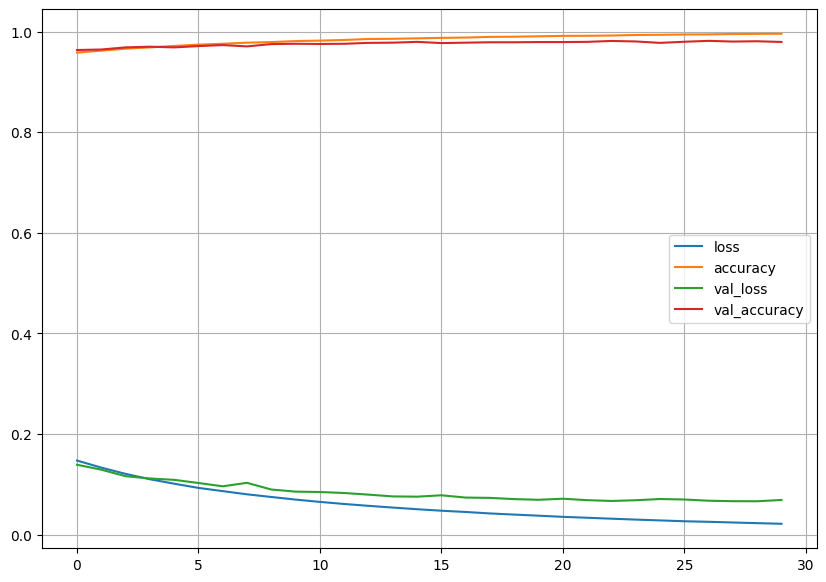

In [52]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [53]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 0s 999us/step - loss: 0.0727 - accuracy: 0.9782


[0.07267928868532181, 0.9782000184059143]

In [54]:
10000/32

312.5

In [55]:
model_clf.save("mnist_full.h5")

In [57]:
X_new = X_test[:3]
y_prob = model_clf.predict(X_new)
y_prob.

1/1 [==============================] - 0s 18ms/step


array([[5.1265198e-07, 6.2364215e-08, 1.2035150e-05, 1.5477781e-04,
        7.9318013e-10, 1.8929485e-07, 1.9373400e-12, 9.9981171e-01,
        1.3644174e-06, 1.9326508e-05],
       [9.9093370e-07, 2.2379483e-05, 9.9987698e-01, 8.8485569e-05,
        7.7754886e-12, 9.6904360e-09, 4.3305031e-06, 5.2583901e-12,
        6.9438643e-06, 1.1019788e-12],
       [4.1431085e-06, 9.9673778e-01, 1.2557335e-04, 4.2403586e-05,
        5.0661230e-04, 5.9573522e-05, 4.8717502e-05, 1.4460726e-03,
        9.6578617e-04, 6.3408181e-05]], dtype=float32)

In [58]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

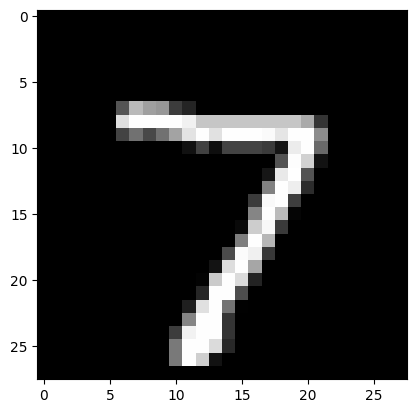

In [59]:
plt.imshow(X_new[0],cmap='gray')

In [61]:
y_pred = np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

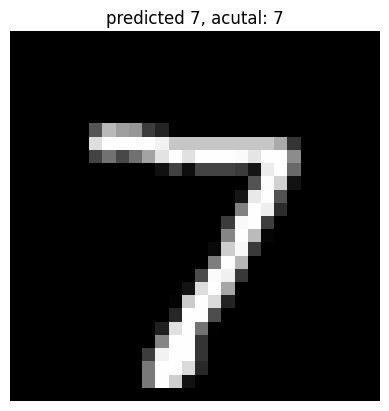

____________________________________________________________


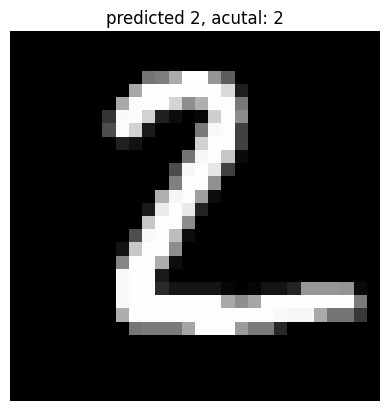

____________________________________________________________


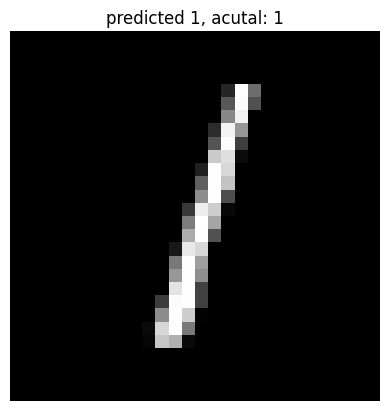

____________________________________________________________


In [65]:
for img_array,pred,actual in zip(X_new,y_pred,y_test[:3]):
    plt.imshow(img_array,cmap='gray')
    plt.title(f"predicted {pred}, acutal: {actual}")
    plt.axis("off")
    plt.show()
    print("__"*30)

# 1-2 Transfer Learning
      New Problem statement
      Classify handwritten digits into odd and even

In [66]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [67]:
pretrained_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayers01 (Dense)      (None, 300)               235500    
                                                                 
 hiddenLayers02 (Dense)      (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [75]:
for layer in pretrained_model.layers:
    print (f'{layer.name}: {layer.trainable}')

inputlayer: True
hiddenLayers01: True
hiddenLayers02: True
outputLayer: True


In [83]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [84]:
lower_pretrained_model =  pretrained_model.layers[:-1]


In [85]:
NEW_LAYERS = [
    lower_pretrained_model,
    tf.keras.layers.Dense(2,activation="softmax")
]
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [86]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayers01 (Dense)      (None, 300)               235500    
                                                                 
 hiddenLayers02 (Dense)      (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [82]:
100*2+2

202

In [87]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0,1,0) # 1 -> evem ,0-> odd
    return labels

In [88]:
y_train_bin,y_test_bin, y_valid_bin = update_even_odd_labels([y_train,y_test, y_valid])

In [89]:
np.unique(y_train_bin)

array([0, 1])

In [91]:
new_model.compile(loss ="sparse_categorical_crossentropy",
                 optimizer = "SGD",
                 metrics = "accuracy")

In [92]:
history = new_model.fit(
            X_train,y_train_bin,epochs=10,validation_data=(X_valid,y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1721 - accuracy: 0.9367 - val_loss: 0.1291 - val_accuracy: 0.9560
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1179 - accuracy: 0.9587 - val_loss: 0.1133 - val_accuracy: 0.9604
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1064 - accuracy: 0.9626 - val_loss: 0.1047 - val_accuracy: 0.9614
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0997 - accuracy: 0.9650 - val_loss: 0.1012 - val_accuracy: 0.9620
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0957 - accuracy: 0.9663 - val_loss: 0.0972 - val_accuracy: 0.9636
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0928 - accuracy: 0.9669 - val_loss: 0.0962 - val_accuracy: 0.9646
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0906 - accuracy: 0.9676 - val_loss: 0.0935 - val_accuracy:

In [94]:
new_model.evaluate(X_test,y_test_bin)

313/313 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9691


[0.09556497633457184, 0.9690999984741211]

In [97]:
y_pred= np.argmax(y_prob,axis=1)
y_pred

array([0, 1, 0], dtype=int64)

In [100]:
y_test_bin[:3]

array([0, 1, 0])

In [150]:
X_new = X_test[:3]
y_prob = new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 45ms/step


array([[1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

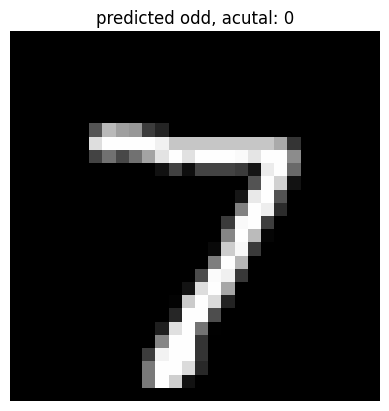

____________________________________________________________


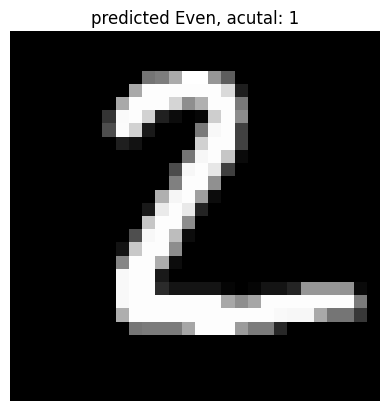

____________________________________________________________


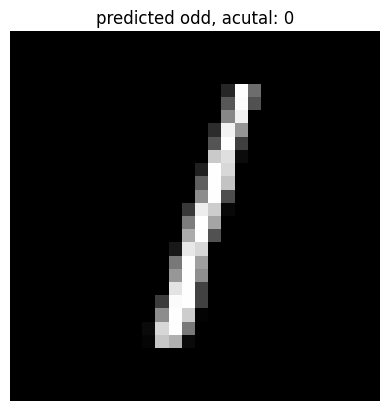

____________________________________________________________


In [101]:
for img_array,pred,actual in zip(X_new,y_pred,y_test_bin[:3]):
    if pred == 1:
        pred ="Even"
    else:
        pred = "odd"
    if actual ==1:
        acutal = "even"
    else:
        pred = "odd"
    plt.imshow(img_array,cmap='gray')
    plt.title(f"predicted {pred}, acutal: {actual}")
    plt.axis("off")
    plt.show()
    print("__"*30)

# 2-1 Train A CNN Model on MNIST dataset

In [102]:
X_train[0].shape

(28, 28)

In [113]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [151]:
X_train_CNN = np.expand_dims(X_train,-1)
X_test_CNN = np.expand_dims(X_test,-1)
X_valid_CNN = np.expand_dims(X_valid,-1)

In [105]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [107]:
X_train_CNN[0].shape

(28, 28, 1)

In [112]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [171]:
input_shape = (28,28,1) #(row,col,channels)
CLASSES =10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES,activation="softmax")
    
]

In [172]:
CNN_model = tf.keras.Sequential(
            LAYERS
)


In [173]:
CNN_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_11 (Dense)            (None, 10)              

In [124]:
((3*3)+1)*3

30

In [118]:
28-3+1/1

26.0

In [123]:
(26-2)//2+1

13

In [126]:
(3*3*32+1)*64

18496

In [127]:
1600*10+10

16010

#Assignment =
1. Train this model
2. Try Transfer learning by changing the layer to classify no as even  and odd

In [142]:
CNN_model.compile(optimizer="SGD", loss = "sparse_categorical_crossentropy",metrics="accuracy")
history_CNN = CNN_model.fit(X_train_CNN,y_train,validation_data = (X_valid_CNN,y_valid),epochs=10,use_multiprocessing=True)

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0512 - val_accuracy: 0.9870
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0480 - val_accuracy: 0.9876
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0473 - val_accuracy: 0.9876
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.0464 - val_accuracy: 0.9878
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0492 - val_accuracy: 0.9870
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.0474 - val_ac

In [147]:
X_test_CNN.shape

(3, 28, 28, 1)

In [152]:
y_prob_CNN = CNN_model.evaluate(X_test_CNN,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.7253 - accuracy: 0.9877


In [157]:
X_new_CNN = X_test_CNN[:3]
y_prob = model_clf.predict(X_new_CNN)
y_prob.round(3)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [156]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([7, 2, 1], dtype=int64)

In [158]:
CNN_model.save("CNNmodel.h5")

# 2-2 Transfer Learning CNN
    New Problem statement
    Classify handwritten digits into odd and even

In [159]:
pretrainedCNN_model = tf.keras.models.load_model("CNNmodel.h5")

In [180]:
pretrainedCNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [161]:
for layer in pretrainedCNN_model.layers:
    print(f'{layer.name} : {layer.trainable}')

conv2d : True
max_pooling2d : True
conv2d_1 : True
max_pooling2d_1 : True
flatten : True
dense_5 : True


In [175]:
for layer in pretrainedCNN_model.layers[:-1]:
    layer.trainable = False
    

In [181]:
for layer in pretrainedCNN_model.layers:
    print(f'{layer.name} : {layer.trainable}')

conv2d : False
max_pooling2d : False
conv2d_1 : False
max_pooling2d_1 : False
flatten : False
dense_5 : True


In [188]:
lower_pretrained_CNN_Model = pretrainedCNN_model.layers[:-1]

new_CNN_model = tf.keras.models.Sequential(lower_pretrained_CNN_Model)
new_CNN_model.add(
    tf.keras.layers.Dense(2,activation="softmax")
)


In [189]:
new_CNN_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [190]:
def update_even_odd_labels(labels):
    for idx,label in enumerate(labels):
        labels[idx] = np.where(label%2==0,1,0)
    return labels
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [191]:
new_CNN_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [193]:
history = new_CNN_model.fit(X_train_CNN,y_train_bin,validation_data=(X_valid_CNN,y_valid_bin),
                            epochs=10
                           )

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0845 - accuracy: 0.9707 - val_loss: 0.0636 - val_accuracy: 0.9770
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0736 - accuracy: 0.9739 - val_loss: 0.0822 - val_accuracy: 0.9718
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0677 - accuracy: 0.9771 - val_loss: 0.0680 - val_accuracy: 0.9762
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0636 - accuracy: 0.9783 - val_loss: 0.0527 - val_accuracy: 0.9838
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0600 - accuracy: 0.9794 - val_loss: 0.0530 - val_accuracy: 0.9836
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0603 - accuracy: 0.9791 - val_loss: 0.0545 - val_accuracy: 0.9818
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0575 - accuracy: 0.9807 - val_loss: 0.0901 - val_accuracy:

In [194]:
new_CNN_model.evaluate(X_test_CNN,y_test_bin)

313/313 [==============================] - 1s 3ms/step - loss: 13.8478 - accuracy: 0.9703


[13.847832679748535, 0.970300018787384]

In [198]:
X_CNN_new = X_test_CNN[4:10]
y_CNN_prob = new_CNN_model.predict(X_CNN_new)
y_CNN_prob.round(3)

1/1 [==============================] - 0s 16ms/step


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [199]:
y_CNN_pred = np.argmax(y_CNN_prob,axis=1)
y_CNN_pred

array([1, 0, 1, 0, 0, 0], dtype=int64)

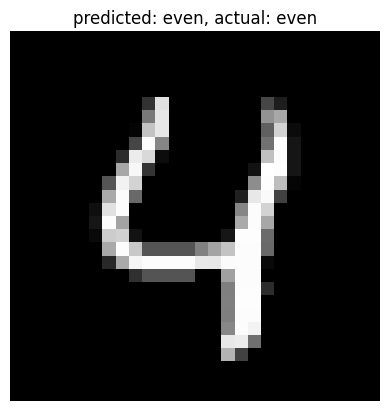

------------------------------------------------------------


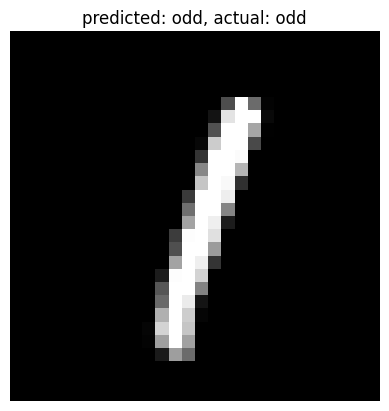

------------------------------------------------------------


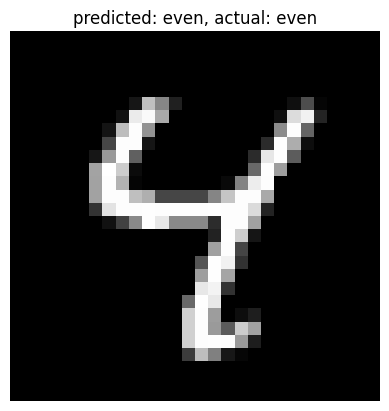

------------------------------------------------------------


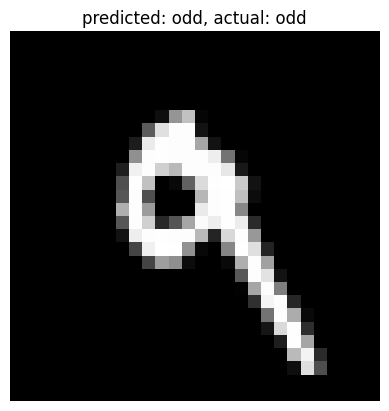

------------------------------------------------------------


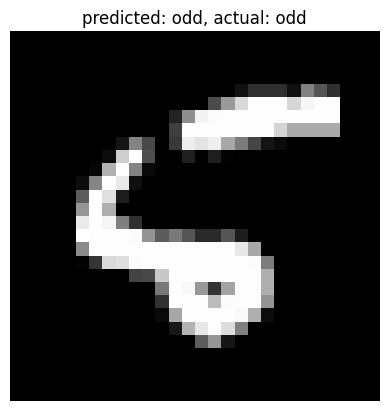

------------------------------------------------------------


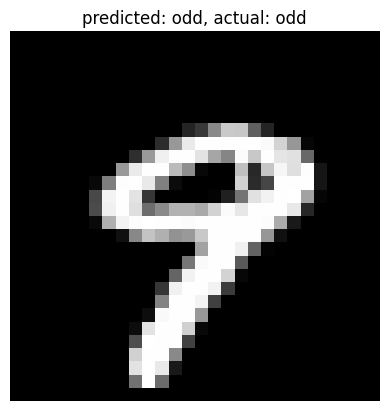

------------------------------------------------------------


In [200]:
for img_array, pred, actual in zip(X_CNN_new, y_CNN_pred, y_test_bin[4:10]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)